In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import Image

In [2]:
df = pd.read_json(
    'https://services.swpc.noaa.gov/json/goes/primary/xrays-7-day.json'
)
sat = df['satellite'].unique()
if len(sat) == 1:
    sat = sat[0]
    print(f"GOES satellite: {sat}")
else:
    print(f"Multiple satellites found: {sat}")
    sat = sat[0]
df = df.pivot(
    index='time_tag',
    columns='energy',
    values='flux'
)
df.index = pd.to_datetime(
    df.index,
    format='%Y-%m-%dT%H:%M:%SZ'
)
print(df.index.min())
print(df.index.max())

GOES satellite: 18
2025-11-08 01:20:00
2025-11-15 01:16:00


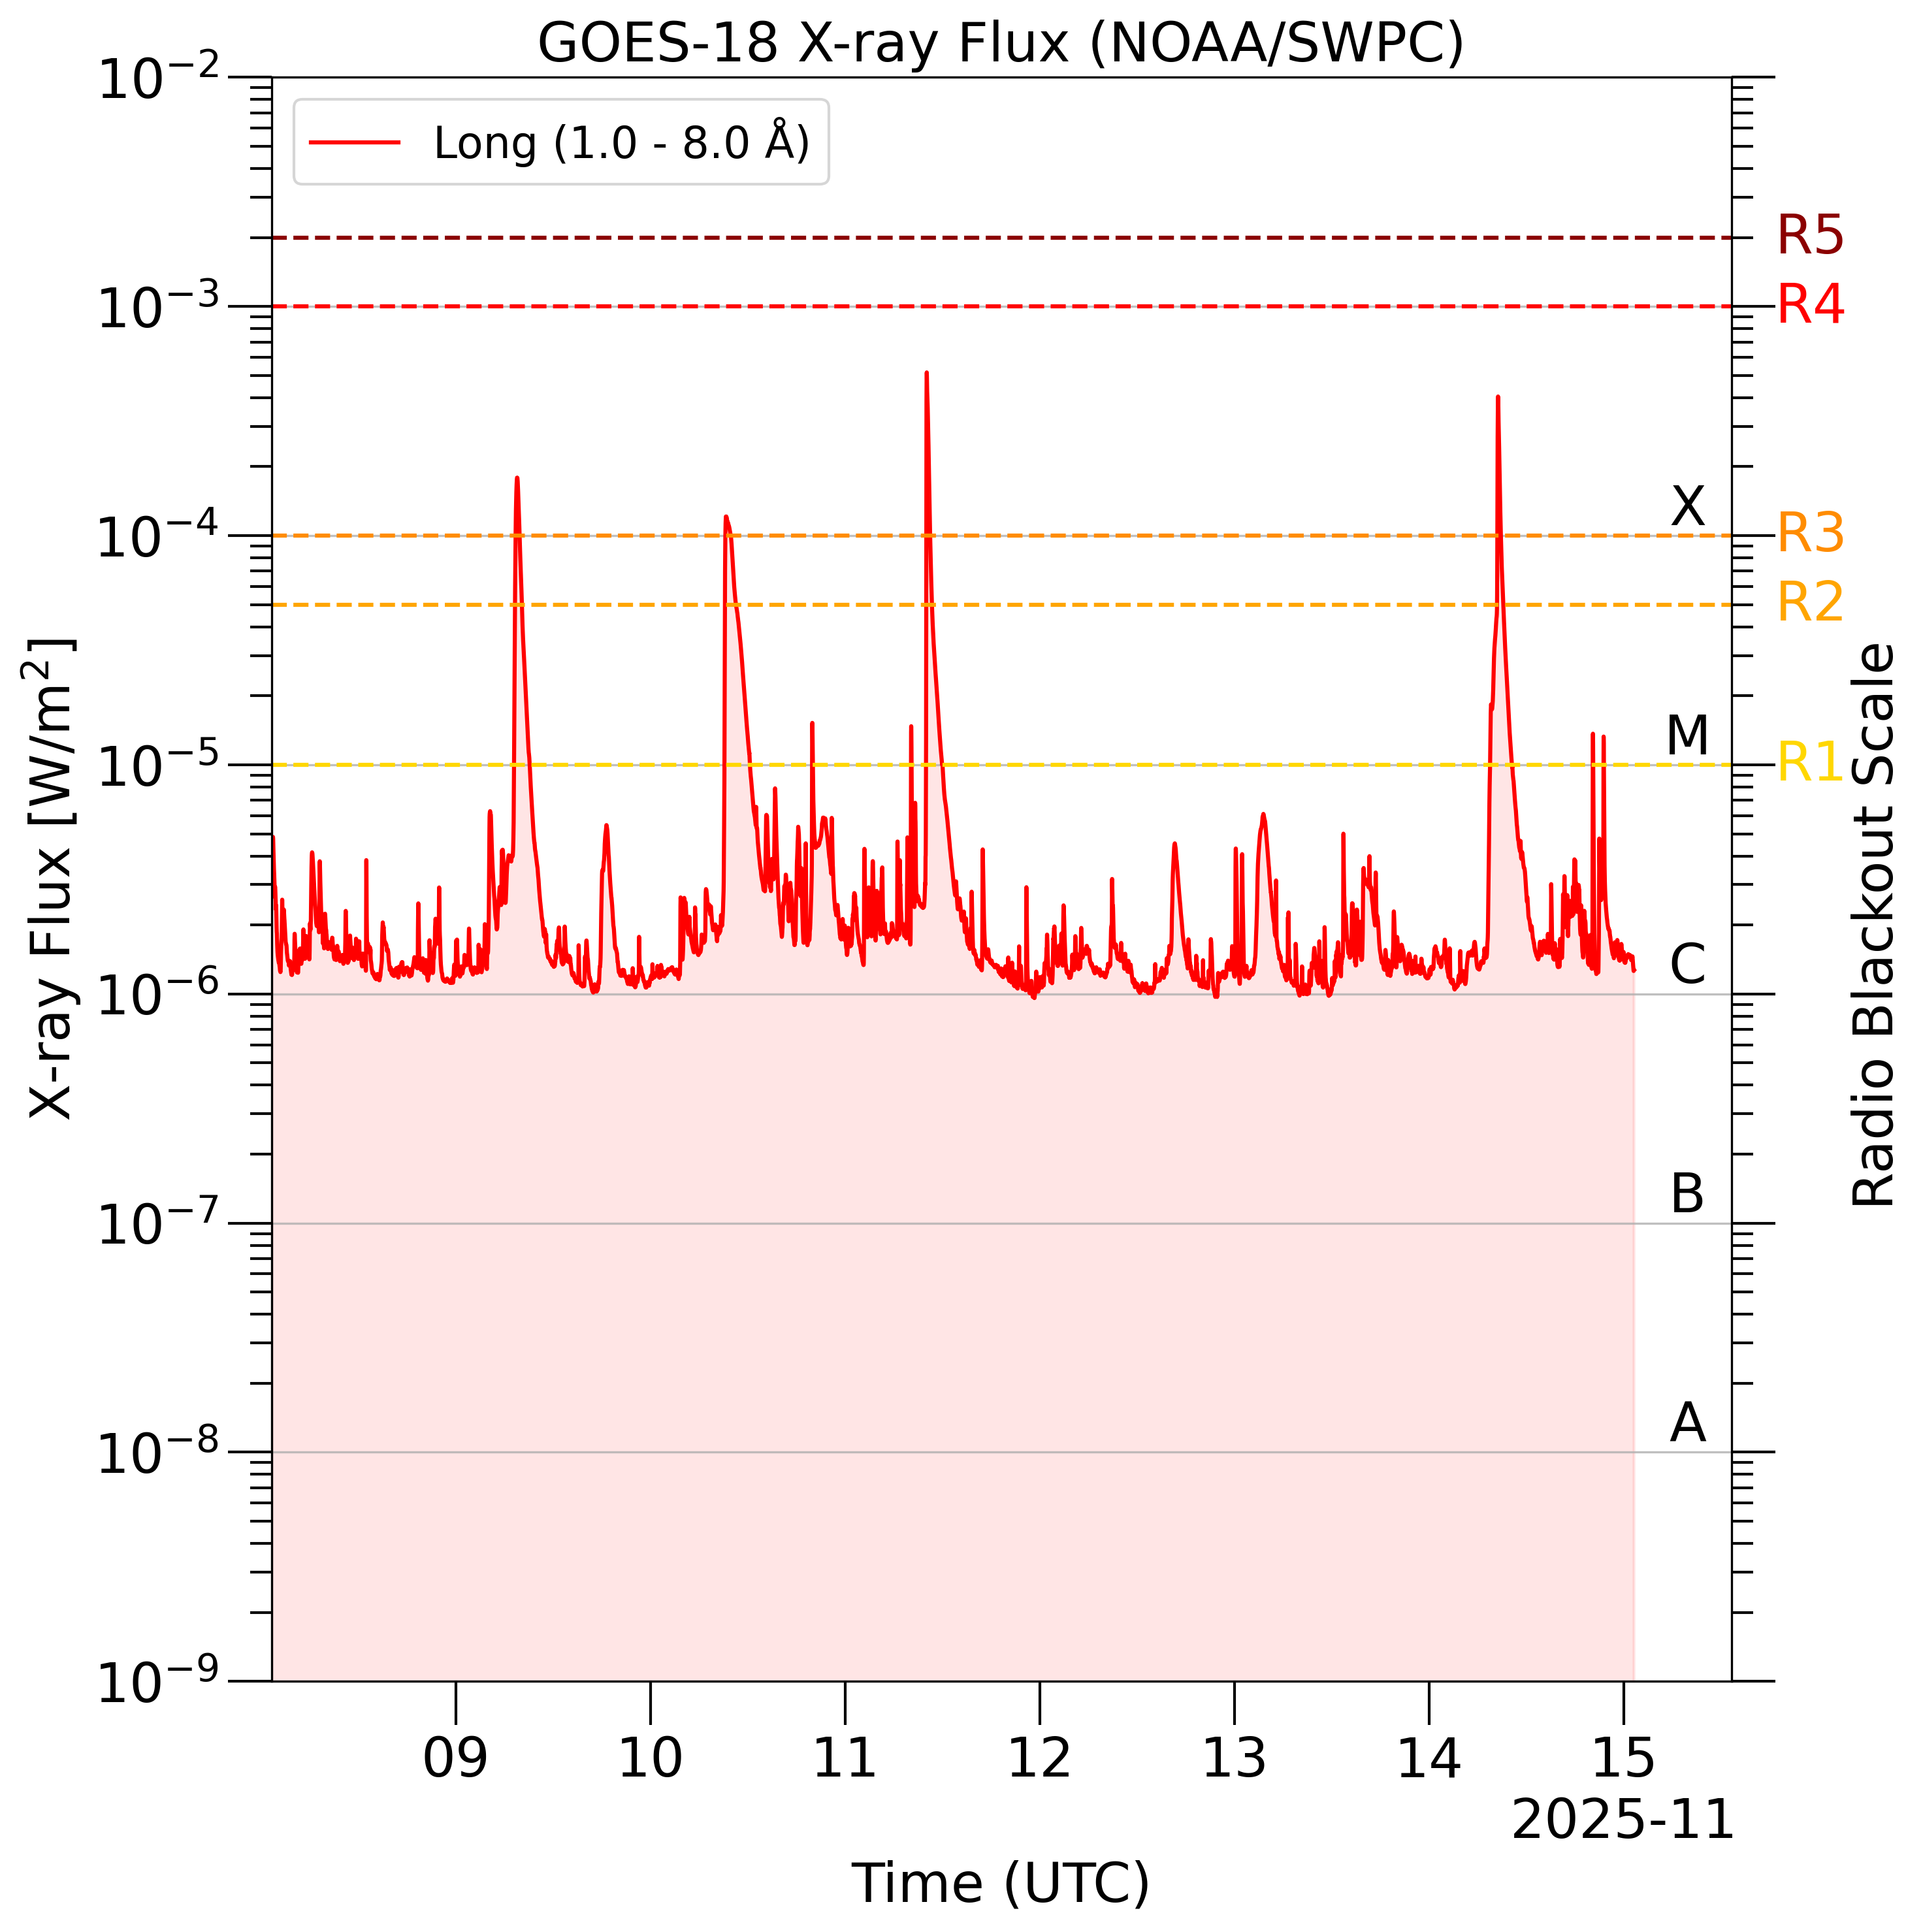

In [3]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(
    df.index,
    df['0.1-0.8nm'],
    label='Long (1.0 - 8.0 Å)',
    color='red',
)
ax.legend(fontsize=16, loc='upper left')
ax.fill_between(
    df.index,
    df['0.1-0.8nm'],
    color='red',
    alpha=0.1,
)
ax.set_ylabel('X-ray Flux [W/m$^2$]', fontsize=20)
ax.set_xlabel('Time (UTC)', fontsize=20)
ax.set_title(f'GOES-{sat} X-ray Flux (NOAA/SWPC)', fontsize=20)
ax.set_yscale('log')
ax.set_ylim(1e-9, 1e-2)
ax.set_yticks(np.logspace(-9, -2, num=8))
ax.tick_params(axis='both', which='major', labelsize=20, length=16, width=1)
ax.tick_params(axis='both', which='minor', labelsize=20, length=8, width=1)
ax.tick_params(axis='y', which='both', right=True)

def custom_formatter(x, pos):
    ticks = ax.get_xticks()
    if len(ticks) == 0:
        return ""
    
    # Last tick (end of day)
    if abs(x - ticks[-1]) < 1e-6:
        dt = mdates.num2date(x)
        ym = dt.strftime("%Y-%m")
        d = dt.strftime("%d")
        return f"{d}\n{ym}"
    
    # Other ticks (day of month)
    dt = mdates.num2date(x)
    return dt.strftime("%d")

ax.xaxis.set_major_formatter(custom_formatter)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.set_xlim(df.index.min(), df.index.max()+pd.Timedelta(days=0.5))

ax.grid(True, which='major', axis='y', linestyle='-', alpha=0.8)

ax.axhline(1e-5, color='gold', linestyle='--', zorder=2)
ax.text(1.03, 1e-5, 'R1', color='gold', fontsize=20, 
        va='center', transform=ax.get_yaxis_transform())
ax.axhline(5e-5, color='orange', linestyle='--', zorder=2)
ax.text(1.03, 5e-5, 'R2', color='orange', fontsize=20, 
        va='center', transform=ax.get_yaxis_transform())
ax.axhline(1e-4, color='darkorange', linestyle='--', zorder=2)
ax.text(1.03, 1e-4, 'R3', color='darkorange', fontsize=20, 
        va='center', transform=ax.get_yaxis_transform())
ax.axhline(1e-3, color='red', linestyle='--', zorder=2)
ax.text(1.03, 1e-3, 'R4', color='red', fontsize=20, 
        va='center', transform=ax.get_yaxis_transform())
ax.axhline(2e-3, color='darkred', linestyle='--', zorder=2)
ax.text(1.03, 2e-3, 'R5', color='darkred', fontsize=20, 
        va='center', transform=ax.get_yaxis_transform())
ax.text(1.1, 2e-6, 'Radio Blackout Scale', rotation=90, fontsize=20, 
        va='center', ha='center', transform=ax.get_yaxis_transform())

ax.text(0.97, 1e-8, 'A', fontsize=20, va='bottom', ha='center', transform=ax.get_yaxis_transform(), 
        color='black')
ax.text(0.97, 1e-7, 'B', fontsize=20, va='bottom', ha='center', transform=ax.get_yaxis_transform(), 
        color='black')
ax.text(0.97, 1e-6, 'C', fontsize=20, va='bottom', ha='center', transform=ax.get_yaxis_transform(), 
        color='black')
ax.text(0.97, 1e-5, 'M', fontsize=20, va='bottom', ha='center', transform=ax.get_yaxis_transform(), 
        color='black')
ax.text(0.97, 1e-4, 'X', fontsize=20, va='bottom', ha='center', transform=ax.get_yaxis_transform(), 
        color='black')


fig.tight_layout()
plt.savefig('goes_xray_flux.png', dpi=300, bbox_inches='tight')
plt.close(fig)
Image('goes_xray_flux.png')